In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

In [3]:
with open('Conline_endprice.pickle', 'rb') as fp:
    classic_price = pickle.load(fp)

# with open('classic20_rand_endprice.pickle', 'rb') as fp:
#     rand_price = pickle.load(fp)

with open('classic2250_rand_endprice.pickle', 'rb') as fp:
    longrand_price = pickle.load(fp)
    
with open('classic_rank_endprice.pickle', 'rb') as fp:
    rank_price = pickle.load(fp)
    
player0 = []
player1 = []
for i in range(len(classic_price)):
    # Last 20 prices are saved
    for k in range(20):
        player0.append(classic_price[i][k][0])
        player1.append(classic_price[i][k][1])

# rand_player0 = []
# rand_player1 = []
# for i in range(len(rand_price)):
#     for k in range(20):
#         rand_player0.append(rand_price[i][k][0])
#         rand_player1.append(rand_price[i][k][1])

long_player0 = []
long_player1 = []
for i in range(len(longrand_price)):
    for k in range(20):
        long_player0.append(longrand_price[i][k][0])
        long_player1.append(longrand_price[i][k][1])

rank_player0 = []
rank_player1 = []
for i in range(len(rank_price)):
    for k in range(20):
        rank_player0.append(rank_price[i][k][0])
        rank_player1.append(rank_price[i][k][1])

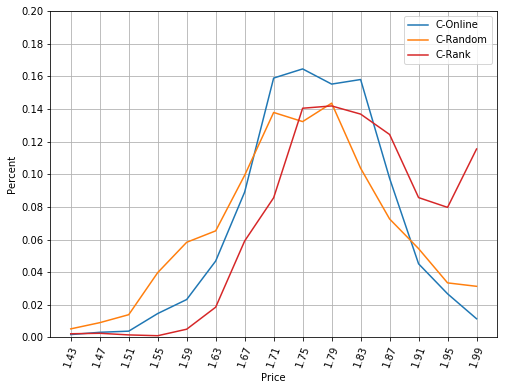

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
price = np.arange(1.43, 2.0, 0.04)
ax.plot(price, np.unique(np.array(player0), return_counts=True)[1]/len(player0),
        color='tab:blue', label='C-Online')
# ax.plot(price, np.unique(np.array(rand_player0), return_counts=True)[1]/len(rand_player0),
#         color='tab:orange', label='C-Random')

ax.plot(price, np.unique(np.array(long_player0), return_counts=True)[1]/len(long_player0),
        color='tab:orange', label='C-Random')

ax.plot(price, np.unique(np.array(rank_player0), return_counts=True)[1]/len(rank_player0),
        color='tab:red', label ='C-Rank')
plt.xticks(price)
plt.xticks(rotation=70) 
plt.ylim(0.0, 0.2)
plt.yticks(np.arange(0, 0.21, 0.02))
ax.set_ylabel('Percent')
ax.set_xlabel('Price')
ax.legend(loc='best')
ax.grid(True)
plt.savefig('classic.eps', format='eps', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [5]:
with open('classic_rank_Q.pickle', 'rb') as fp:
    rank_Q = pickle.load(fp)

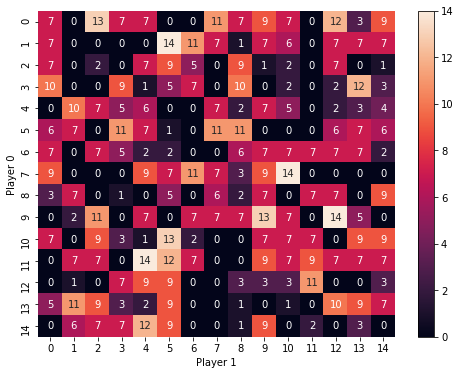

In [6]:
lheat0 = rank_Q[0][0].argmax(2)
lheat1 = rank_Q[0][1].argmax(2)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(lheat0, cbar=False, annot=True)
plt.xlabel('Player 1')
plt.ylabel('Player 0')
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12, 14])

In [2]:
#### Unused
# with open('fixed_output.txt') as fp:
#     text = fp.read()
# sentences = text.split("\n")

# re.findall(r'[0-9]+', '123a4a1234')

# price = []
# for sentence in sentences:
#     a = re.findall(r'[0-9]+', sentence)
#     for i in range(len(a)):
#         if len(a[i]):
#             price.append(float(a[i]))

# price = []
# for sentence in sentences:
#     if 'Terminate' in sentence:
#         a = re.search('\[(.+?)\]', sentence).group(1).split(' ')
#         for i in range(len(a)):
#             if len(a[i]):
#                 price.append(float(a[i]))